# **Fake news detector**

## Import libraries

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import re
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter


## Datapath

In [12]:
true_csv_path = 'data/True.csv/True.csv'
fake_csv_path = 'data/Fake.csv/Fake.csv'

df_true = pd.read_csv(true_csv_path)
df_fake = pd.read_csv(fake_csv_path)

## Data preview

In [13]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [14]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


## Types of real news

In [15]:
print("Types of True news: ")
subject_counts_true = df_true['subject'].value_counts()
print("Counts of different types of news:")
print(subject_counts_true)

Types of True news: 
Counts of different types of news:
subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64


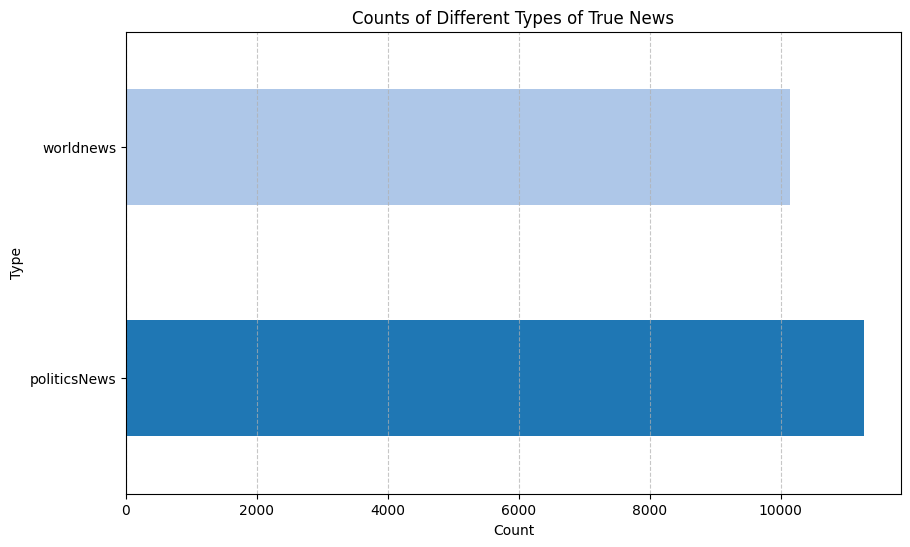

In [16]:
colors = plt.cm.tab20.colors
plt.figure(figsize=(10, 6))
subject_counts_true.plot(kind='barh', color=colors[:len(subject_counts_true)])
plt.title('Counts of Different Types of True News')
plt.xlabel('Count')
plt.ylabel('Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Types of Fake news

In [17]:
print("Types of Fake news: ")
subject_counts_fake = df_fake['subject'].value_counts()
print("Counts of different types of news:")
print(subject_counts_fake)

Types of Fake news: 
Counts of different types of news:
subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


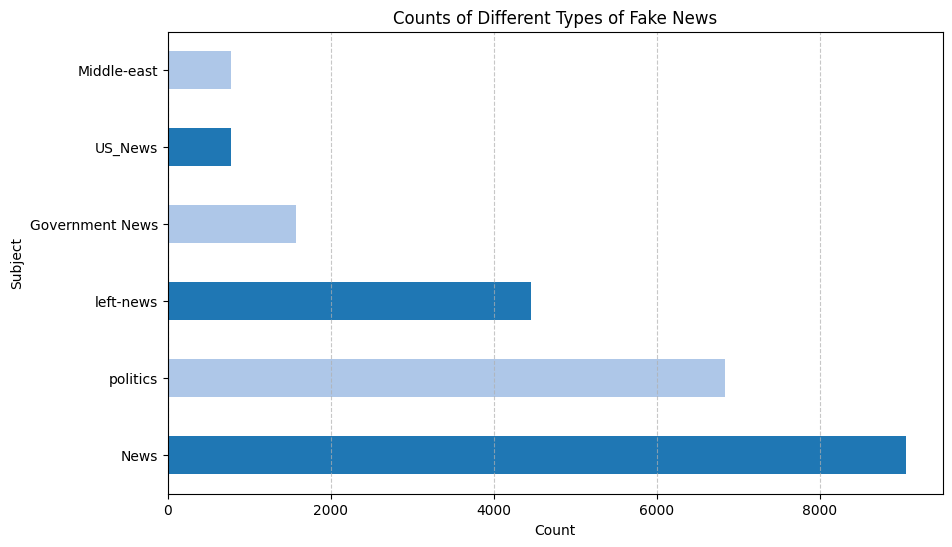

In [18]:
plt.figure(figsize=(10, 6))
subject_counts_fake.plot(kind='barh', color=colors[:len(subject_counts_true)])
plt.title('Counts of Different Types of Fake News')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Labeling the dataset

In [19]:
df_true['label']=1
df_fake['label']=0

In [20]:
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [21]:
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


## Combining dataset

In [24]:
data_combined = pd.concat([df_true, df_fake], ignore_index=True)
data = data_combined.sample(frac=1).reset_index(drop=True)
data

,title,text,subject,date,label
0,Trump plans to meet oil industry reps on U.S. ...,(Reuters) - U.S. President Donald Trump has ag...,politicsNews,"December 1, 2017",1
1,Cops Dragged A Half-Naked Woman Into Her Cour...,"A Louisville, Kentucky Metro Corrections judge...",News,"July 30, 2016",0
2,U.N. starting to gather testimony on Myanmar v...,GENEVA (Reuters) - U.N. investigators have sta...,worldnews,"September 19, 2017",1
3,"Taxpayers Billed $800,000 A Year For Prayers ...",American taxpayers are being charged more than...,News,"April 27, 2016",0
4,Melania Trump Dedicates Garden At Children’s H...,It was like garden and guns today for the Pres...,politics,"Apr 28, 2017",0
...,...,...,...,...,...
44893,BREAKING: FINALLY! New Wikileaks Email…”We are...,This latest Wikileaks email is evidence of mor...,politics,"Nov 1, 2016",0
44894,RESPECT: HOLLYWOOD ACTOR VOLUNTEERS TO FIGHT I...,Not every Hollywood actor is a liberal nut job...,politics,"May 14, 2015",0
44895,Eric Trump Claims That Democrats Are “Not Eve...,The apple truly doesn t fall far from the tree...,News,"June 7, 2017",0
44896,House Speaker Ryan understands Trump's frustra...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"March 30, 2017",1


### Check for duplicate

In [33]:
print('Number of duplicated rows：',data.duplicated().sum())

Number of duplicated rows： 209


In [34]:
clean_data = data.drop_duplicates()

In [37]:
print('Number of duplicated rows：',clean_data.duplicated().sum())

Number of duplicated rows： 0


### Check for null value

In [38]:
print(data.isnull().sum())

title      0
text       0
subject    0
date       0
label      0
dtype: int64


### Cleaning text data

In [57]:
batch_size = 100 
num_batches = (len(clean_data) // batch_size) + 1 

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english')])  # Remove stopwords
    return text

def process_batch(batch):
    return batch.apply(clean_text)

tqdm.pandas()

cleaned_batches = []
for i in tqdm(range(num_batches), desc="Processing batches"):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(clean_data))
    batch_data = clean_data.iloc[start_idx:end_idx].copy()
    batch_data['text'] = batch_data['text'].progress_apply(clean_text)  
    cleaned_batches.append(batch_data)

Processing batches: 100%|██████████| 447/447 [24:10<00:00,  3.25s/it]


In [75]:
cleaned_data = pd.concat(cleaned_batches)

### Cleaned data

In [64]:
cleaned_data.head()

,title,text,subject,date,label
0,Trump plans to meet oil industry reps on U.S. ...,reuters us president donald trump agreed meet ...,politicsNews,"December 1, 2017",1
1,Cops Dragged A Half-Naked Woman Into Her Cour...,louisville kentucky metro corrections judge ou...,News,"July 30, 2016",0
2,U.N. starting to gather testimony on Myanmar v...,geneva reuters un investigators started collec...,worldnews,"September 19, 2017",1
3,"Taxpayers Billed $800,000 A Year For Prayers ...",american taxpayers charged 66000 hour prayers ...,News,"April 27, 2016",0
4,Melania Trump Dedicates Garden At Children’s H...,like garden guns today president first lady pr...,politics,"Apr 28, 2017",0


### Most frequently used words

C:\Users\q1\AppData\Local\Temp\ipykernel_9620\2933481360.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Word', y='Frequency', data=true_plot_data, palette='viridis')


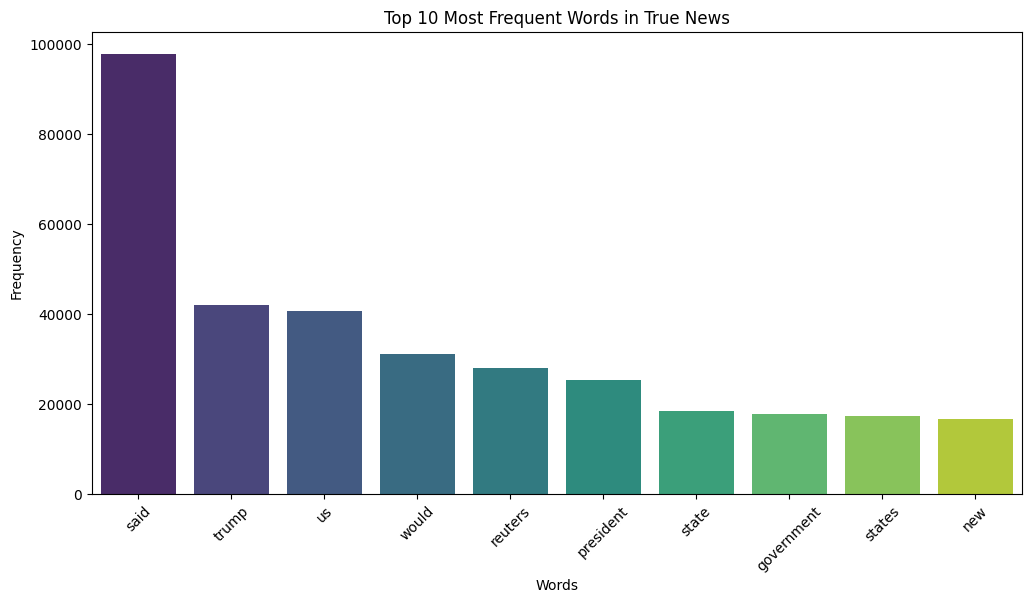

C:\Users\q1\AppData\Local\Temp\ipykernel_9620\2933481360.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Word', y='Frequency', data=fake_plot_data, palette='viridis')


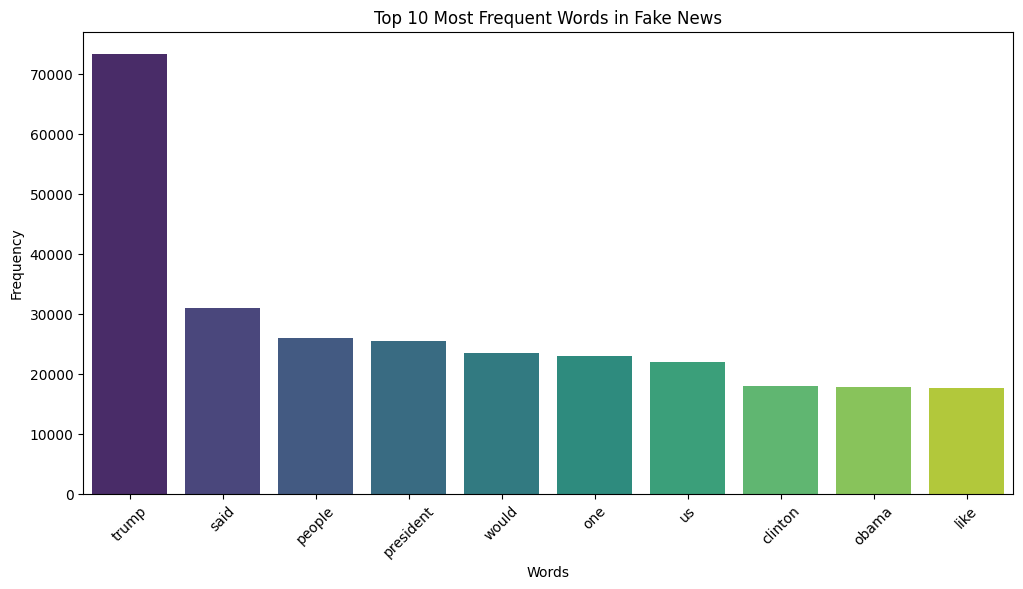

In [74]:
true_news = cleaned_data[cleaned_data['label'] == 1]
fake_news = cleaned_data[cleaned_data['label'] == 0]

all_true_words = []
true_news['text'].apply(lambda x: all_true_words.extend(word_tokenize(x)))

all_fake_words = []
fake_news['text'].apply(lambda x: all_fake_words.extend(word_tokenize(x)))

true_word_freq = Counter(all_true_words)
common_true_words = true_word_freq.most_common(10)  # Get the top 10 words

fake_word_freq = Counter(all_fake_words)
common_fake_words = fake_word_freq.most_common(10)  # Get the top 10 words

true_words, true_counts = zip(*common_true_words)
true_plot_data = pd.DataFrame({
    'Word': true_words,
    'Frequency': true_counts
})

fake_words, fake_counts = zip(*common_fake_words)
fake_plot_data = pd.DataFrame({
    'Word': fake_words,
    'Frequency': fake_counts
})

plt.figure(figsize=(12, 6))
sb.barplot(x='Word', y='Frequency', data=true_plot_data, palette='viridis')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in True News')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sb.barplot(x='Word', y='Frequency', data=fake_plot_data, palette='viridis')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Fake News')
plt.xticks(rotation=45)
plt.show()

In [80]:
clean_data

,title,text,subject,date,label
0,Trump plans to meet oil industry reps on U.S. ...,(Reuters) - U.S. President Donald Trump has ag...,politicsNews,"December 1, 2017",1
1,Cops Dragged A Half-Naked Woman Into Her Cour...,"A Louisville, Kentucky Metro Corrections judge...",News,"July 30, 2016",0
2,U.N. starting to gather testimony on Myanmar v...,GENEVA (Reuters) - U.N. investigators have sta...,worldnews,"September 19, 2017",1
3,"Taxpayers Billed $800,000 A Year For Prayers ...",American taxpayers are being charged more than...,News,"April 27, 2016",0
4,Melania Trump Dedicates Garden At Children’s H...,It was like garden and guns today for the Pres...,politics,"Apr 28, 2017",0
...,...,...,...,...,...
44893,BREAKING: FINALLY! New Wikileaks Email…”We are...,This latest Wikileaks email is evidence of mor...,politics,"Nov 1, 2016",0
44894,RESPECT: HOLLYWOOD ACTOR VOLUNTEERS TO FIGHT I...,Not every Hollywood actor is a liberal nut job...,politics,"May 14, 2015",0
44895,Eric Trump Claims That Democrats Are “Not Eve...,The apple truly doesn t fall far from the tree...,News,"June 7, 2017",0
44896,House Speaker Ryan understands Trump's frustra...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"March 30, 2017",1
